In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [14]:
from google.colab import files
uploaded = files.upload()


Saving pollution_data.csv.csv to pollution_data.csv (2).csv


In [15]:
df = pd.read_csv("pollution_data.csv.csv")

In [20]:
print(df.columns)


Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')


In [21]:
df.rename(columns={
    "PM2.5 AQI Value": "PM2_5",
    "CO AQI Value": "CO",
    "Ozone AQI Value": "Ozone",
    "NO2 AQI Value": "NO2",
    "AQI Value": "AQI"
}, inplace=True)

In [22]:
features = ["AQI", "CO", "Ozone", "NO2", "PM2_5"]

In [23]:
df_clean = df.dropna(subset=features)

In [24]:
X = StandardScaler().fit_transform(df_clean[features])

In [25]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(X)

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_clean['PCA1'] = X_pca[:, 0]
df_clean['PCA2'] = X_pca[:, 1]

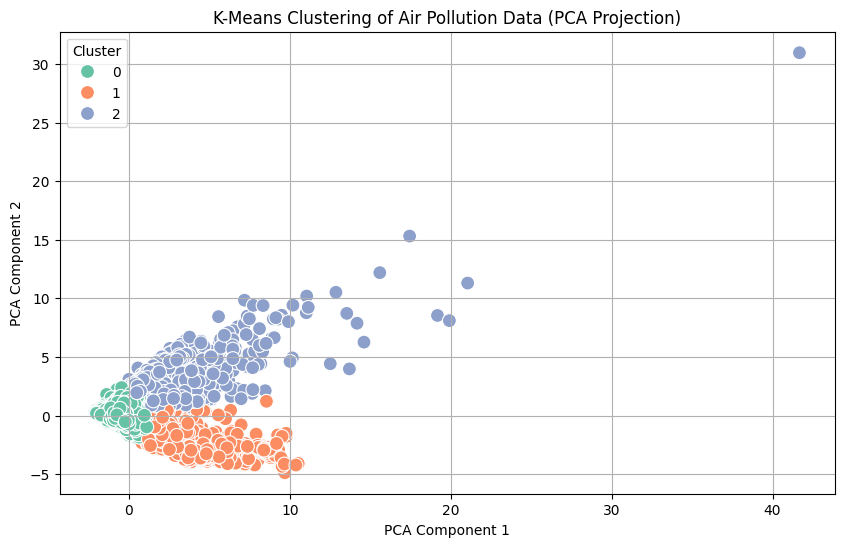

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster',
    data=df_clean, palette='Set2', s=100)

plt.title('K-Means Clustering of Air Pollution Data (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [31]:
cluster_summary = df_clean.groupby('Cluster')[features].mean()
print("Cluster Feature Averages:\n")
print(cluster_summary)

Cluster Feature Averages:

                AQI        CO      Ozone        NO2       PM2_5
Cluster                                                        
0         52.545138  0.994179  30.210540   1.963983   49.536407
1        184.678742  2.160828  86.598328   1.858280  175.163217
2        125.530409  4.414620  15.750877  17.203509  125.461404
